***
<center><h1> Joint Factorization </h1></center>

***

This is a developmental notebook for performing joint factorizations between neural and behavioral data. We assume you've run Face Rhythm to completion. Start by copying your config filepath to this variable, we'll be using it for the rest of this notebook

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

from face_rhythm.util import helpers

config_filepath = '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/configs/config_run1.yaml'# Fill the complete path to your config file here

***
<center><h1> Face with Neural Trace </h1></center>

***

Here's the necessary code for producing face with neural trace videos. We'll add more code for doing the joint factorization within Face Rhythm above... later. 

## Ingest and re-align factors

For this version of the code, we provisionally assume you can provide us with: 
1. A path to an alignment file that has the time series for the neural data and a time series of the camera video 
2. A path to a 'joint factors' h5 file that has all the factors for all the different alphas tested 
3. An alpha index that you want to use for creating videos

This code chunk will save an upsampled, re-aligned temporal factor with a corresponding face factor to the Face Rhythm NWB

## Run the Face with Trace Code
For this code chunk, we expect that you provide us: 
1. The type of factors that you'll be plotting (usually either TCA, PCA, or Neural)
2. The name of the face factor (in this case, just 'factors_spatial')
3. The name of the temporal factor (in this case, just 'factors_temporal')
4. The name of the points to plot (taken from the Face Rhythm NWB)

We also have a bunch of other settings for the face with trace including things like the frame that you want to start on, the length of the video, the size of the dots, the number of factors to plot, etc. 

Give it a second to run! There are a lot of moving parts. 

In [14]:
config['General']['sessions'][0]['videos'] = ['/media/rich/bigSSD/res2p/Camera data/round 5 experiments/mouse 2_6/20210417/cam3/experiment/cam32021-04-18T00_41_02.avi']

config['Paths']['config']  = '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/configs/config_run1.yaml'
config['Paths']['data']    = '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/data'
config['Paths']['project'] = '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt'
config['Paths']['video']   = '/media/rich/bigSSD/res2p/Camera data/round 5 experiments/mouse 2_6/20210417/cam3/experiment'
config['Paths']['viz']     = '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz'
helpers.save_config(config, config_filepath)

In [15]:
config

{'CDR': {'display_points': False,
  'dot_size': 1,
  'frameNum': 1,
  'kernel_alpha': 0.3,
  'kernel_pixel': 10,
  'num_components': 2,
  'num_dots': 3960,
  'spacing': 13,
  'vidNum': 0,
  'width_cosKernel': 25},
 'CQT': {'bins_per_octave': 5,
  'fmax': 59.999992370624,
  'fmin': 1.874999761582,
  'fmin_rough': 2.1,
  'hop_length': 16,
  'n_bins': 25,
  'sampling_rate': 120.0},
 'Clean': {'framesHalted_afterOutlier': 5,
  'framesHalted_beforeOutlier': 15,
  'outlier_threshold_displacements': 15,
  'outlier_threshold_positions': 150,
  'relaxation_factor': 0.0035},
 'General': {'multisession': False,
  'overwrite_nwbs': False,
  'remote': False,
  'sessions': [{'frames_per_video': 436601,
    'frames_total': 436601,
    'name': 'session',
    'numFrames_total': 436601,
    'num_vids': 1,
    'nwb': '/media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1/data/session.nwb',
    'vid_lens': [436601.0],
    'vid_lens_true': [436601],
    'videos': ['/media/rich/bigSSD/res2p/Camera dat

saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz/Neural__factors_spatial__positions_convDR_absolute__factor_temporal_1.avi
saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz/Neural__factors_spatial__positions_convDR_absolute__factor_temporal_2.avi
saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz/Neural__factors_spatial__positions_convDR_absolute__factor_temporal_3.avi
saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz/Neural__factors_spatial__positions_convDR_absolute__factor_temporal_4.avi
saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz/Neural__factors_spatial__positions_convDR_absolute__factor_temporal_5.avi
saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/20210417/FR_run1_vqt/viz/Neural__factors_spatial__positions_convDR_absolute__factor_temporal_6.avi
saving to file /media/rich/bigSSD/analysis_data/mouse 2_6/

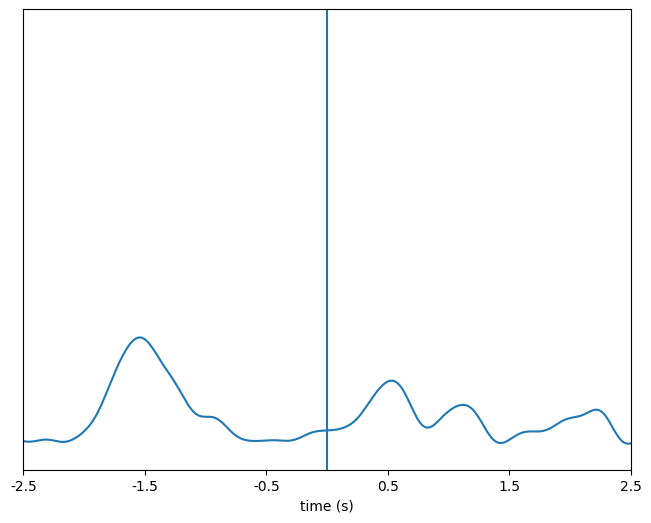

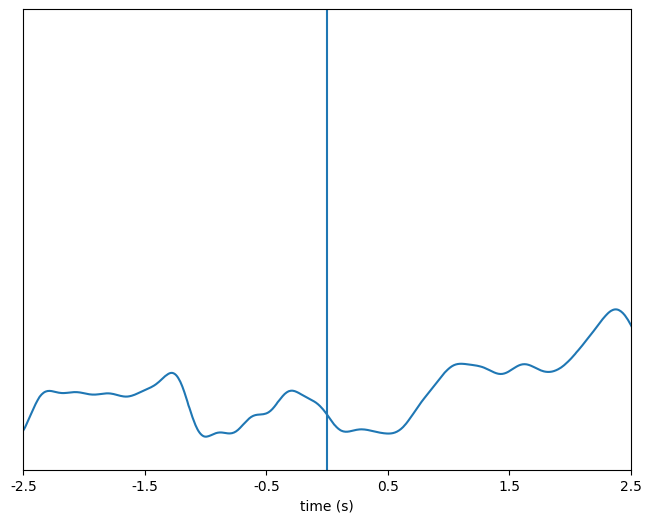

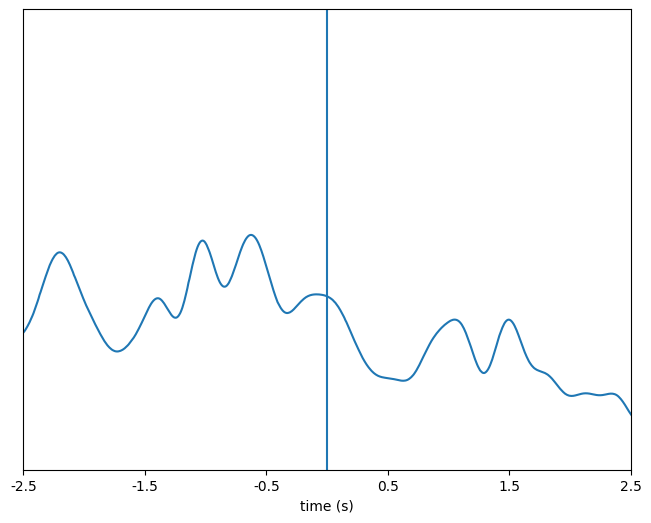

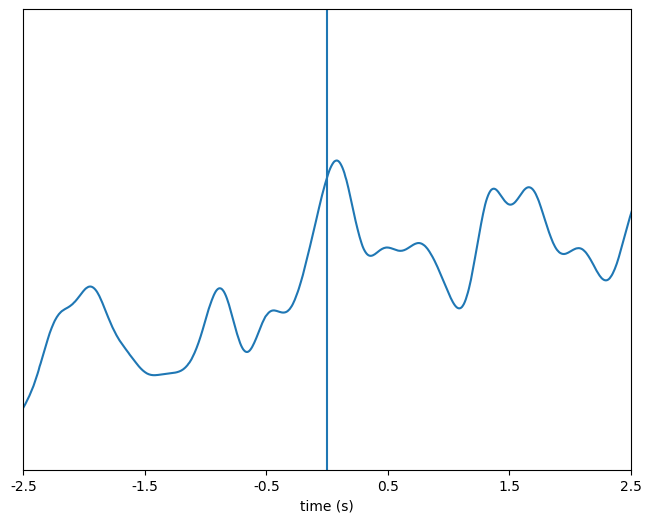

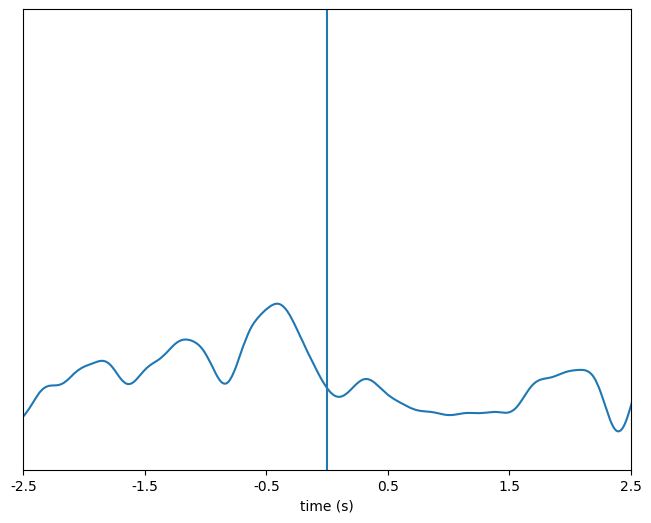

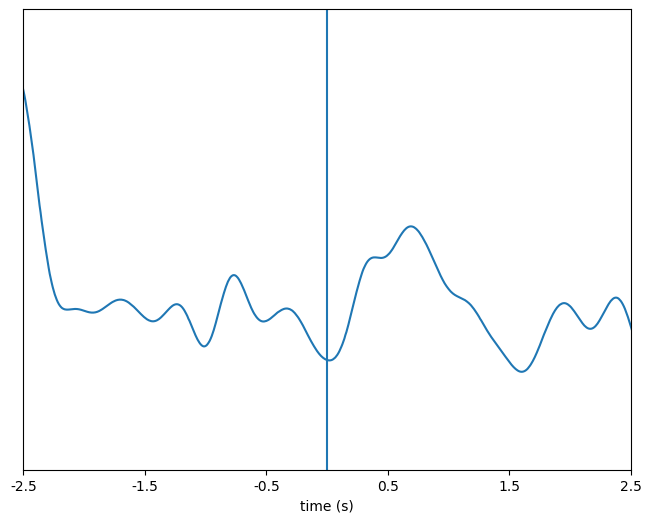

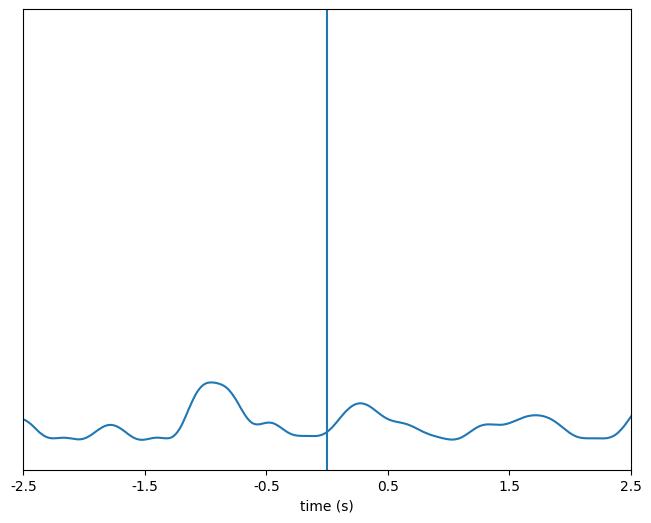

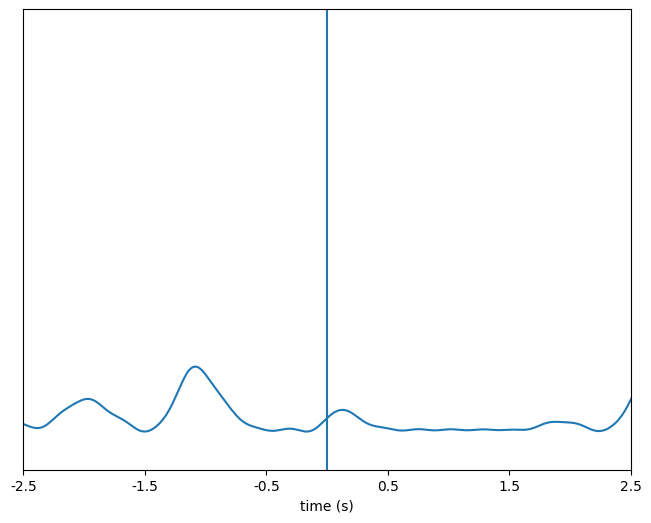

In [21]:
from face_rhythm.visualize import videos
import numpy as np

config = helpers.load_config(config_filepath)
config['Video']['factor_category_to_display'] = 'Neural' # eg: 'TCA' or 'PCA' or 'Neural'
config['Video']['face_factor_to_display'] = 'factors_spatial' # eg: 'factors_spectral_points'
config['Video']['temporal_factor_to_display'] = 'factors_temporal' # eg: 'factors_spectral_temporal'
config['Video']['points_to_display'] = 'positions_convDR_absolute' # eg: 'positions_convDR_absolute' or 'positions_absolute' or 'positions_recursive'

config['Video']['start_vid'] = 0 # 0 indexed
config['Video']['start_frame'] = 70000 # 0 indexed
config['Video']['demo_len'] = 10000
config['Video']['dot_size'] = 3
config['Video']['save_demo'] = True 
config['Video']['factors_to_show'] = [] # 1 indexed, if this is empty, plots all factors
config['Video']['show_alpha'] = False # changes intensity of the colors along with temporal trace
config['Video']['pulse_test_index'] = 0 # if this is nonzero, it will add a pulse and blackout to check syncing
helpers.save_config(config, config_filepath)

videos.face_with_trace(config_filepath)

<IPython.core.display.Javascript object>


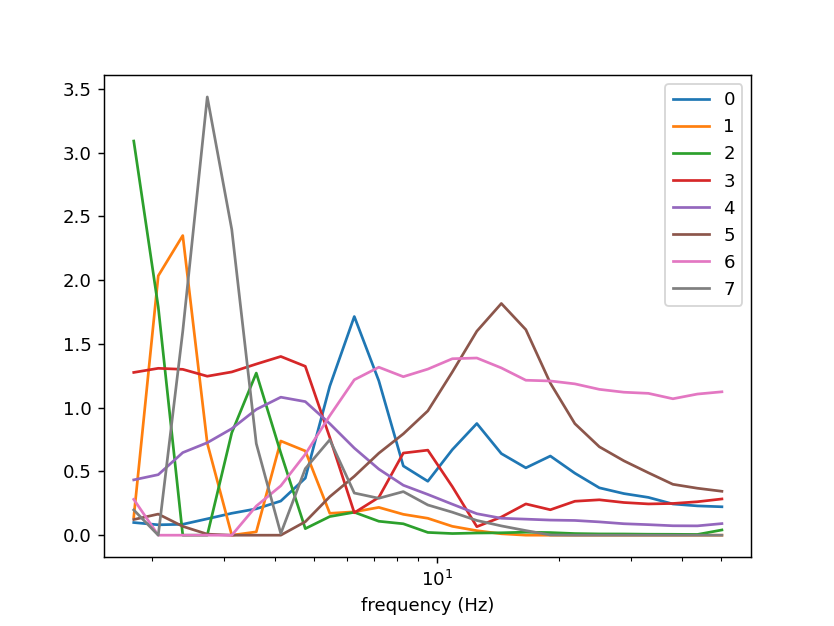

<IPython.core.display.Javascript object>


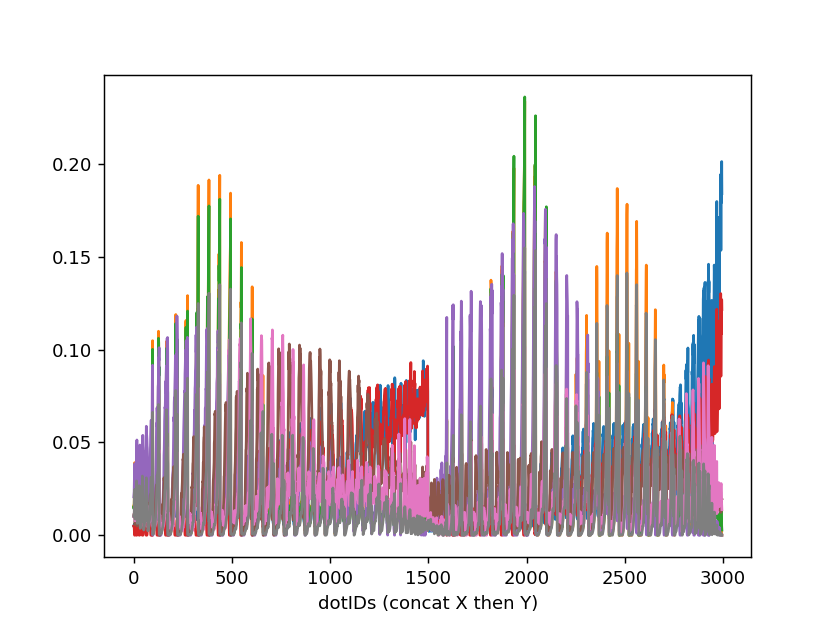

<IPython.core.display.Javascript object>


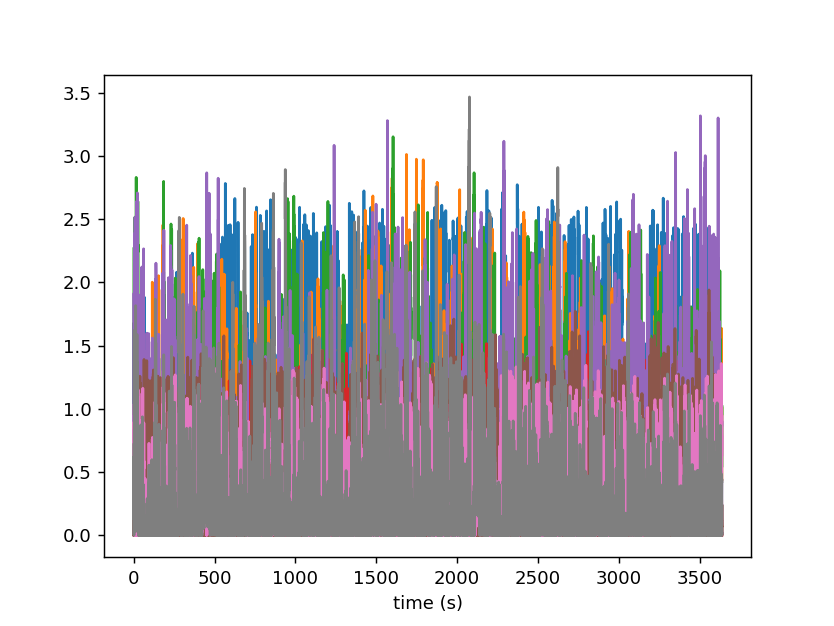

<IPython.core.display.Javascript object>


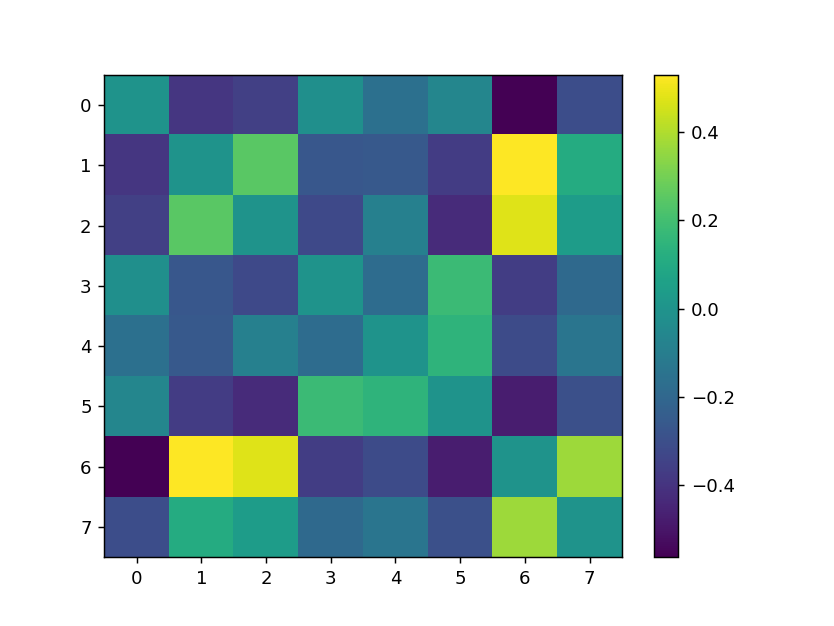

<IPython.core.display.Javascript object>


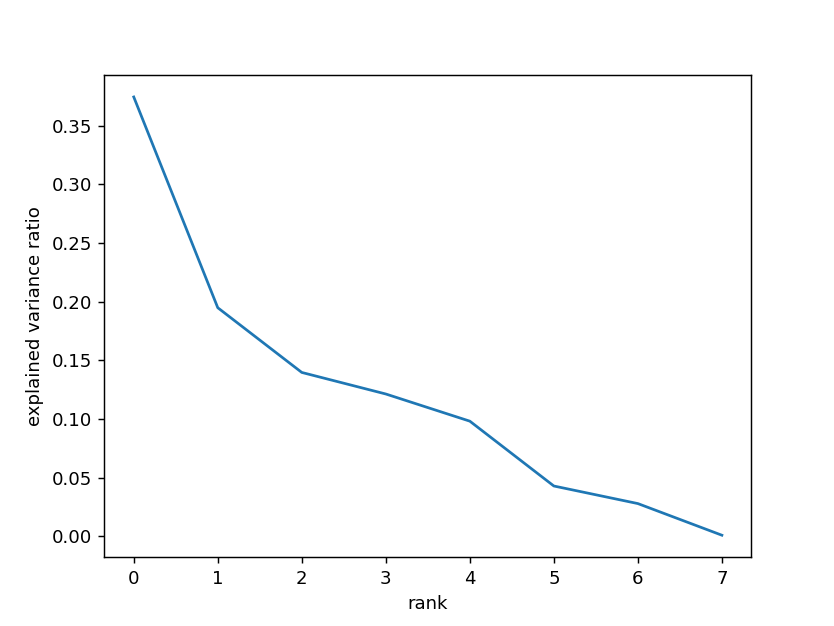

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.decomposition
import pynwb

%matplotlib notebook

config = helpers.load_config(config_filepath)
nwb_path = config['General']['sessions'][0]['nwb']

# freqs_Sxx = np.load(config['Paths']['freqs_Sxx'])
Fs = config['Video']['Fs']

with pynwb.NWBHDF5IO(nwb_path, 'r') as io:
    nwbfile = io.read()
    
    freq_components = nwbfile.processing['Face Rhythm']['TCA']['factors_spectral_spectral'].data
    dot_components = nwbfile.processing['Face Rhythm']['TCA']['factors_spectral_points'].data
    temp_components_interp = nwbfile.processing['Face Rhythm']['TCA']['factors_spectral_temporal_interp'].data
    
    freqs_Sxx = nwbfile.processing['Face Rhythm']['CQT']['freqs_Sxx'].data
    
    num_factors = freq_components.shape[1]

    plt.figure()
    plt.plot(freqs_Sxx , freq_components[:,:])
#     plt.plot(freq_components[:,:])
    plt.xscale('log')
    plt.xlabel('frequency (Hz)')
    plt.legend(np.arange(num_factors))
    
    plt.figure()
    plt.plot(dot_components[:,:])
    plt.xlabel('dotIDs (concat X then Y)')
    
    plt.figure()
    plt.plot(np.arange(temp_components_interp.shape[0])/Fs , temp_components_interp[:,:])
    plt.xlabel('time (s)')
    
    plt.figure()
    plt.imshow(np.corrcoef(np.array(temp_components_interp).T) - np.eye(num_factors),aspect='auto')
    plt.colorbar()
    
    pca = sklearn.decomposition.PCA(n_components=num_factors)
    pca.fit(temp_components_interp)
#     PCA(n_components=8)
    plt.figure()
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('rank')
    plt.ylabel('explained variance ratio')